# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Natural Languague Processing 📝</p>

<p style="text-align:center">
    <a href="https://github.com/ITHealer?tab=repositories" target="_blank">
    <img src="avatar_healer.jpg" width="200" alt="Skills Network Logo"  />
    </a>
    <b>4251050044 - Ung Minh Hoài</b> <br>
</p>

# Sentiment analysis & Opinion mining

# About data 

<details><summary><font color=green>About data</font></summary>
    
•	Dữ liệu chứa hơn 12000 đánh giá về các ứng dụng cửa hàng ứng dụng khác nhau của người dùng thực. Dữ liệu cũng chứa xếp hạng do họ đưa ra để nó có thể được phân loại thành đánh giá tích cực hoặc tiêu cực. Đây là một nơi tốt để thực hiện các nhiệm vụ phân tích tình cảm.
    
</details>

<details><summary><font color=green>Columns</font></summary>
    
1. userName: tên người dùng của người đã đưa ra đánh giá
2. userImage: Vị trí hình ảnh của người dùng đã tải lên dữ liệu
3. content: Nội dung đánh giá
4. score: Xếp hạng do người dùng đưa ra cho ứng dụng (1 - 5), trong đó 5 là tích cực nhất và 1 là tiêu cực nhất
5. thumbsUpCount: Số lượng người dùng đã ủng hộ bài đánh giá
6. reviewCreatedVersion: Phiên bản của bài đánh giá
7. at: Ngày và giờ khi bài đánh giá được đăng
8. replyContent: Trả lời đánh giá ban đầu, nếu có.
9. repliedAt: Ngày và giờ khi câu trả lời được đăng
10. reviewId:
11. sortOrder: Thứ tự được sử dụng để sắp xếp bài đánh giá (mới nhất được sử dụng)
12. appId: ID của Ứng dụng Cửa hàng Play đang được xem xét
    
</details>

# Import library

In [1]:
import re
import os
import nltk
import spacy
import pickle
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')

from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
import spacy
nlp = spacy.load('en_core_web_sm')
warnings.filterwarnings(action='ignore')
%matplotlib inline

## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">Table of Content</p>

* [1. Loading Data 💎](#1)
* [2. EDA 📊](#2)
* [3. Data Preprocessing ⚙️](#3)
* [4. Vectorization - Modeling - Accurracy](#4)

<a id='1'></a>
# 1. Load the dataset

In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [3]:
print(f'Số dòng dữ liệu {df.shape[0]} dòng.')
print(f'Số cột của dữ liệu {df.shape[1]} cột.')

Số dòng dữ liệu 12495 dòng.
Số cột của dữ liệu 12 cột.


<a id='2'></a>
# 2. EDA

* Phân tích dữ liệu khám phá hoặc (EDA) là hiểu các tập dữ liệu bằng cách tóm tắt các đặc điểm chính của chúng thường vẽ biểu đồ trực quan. Bước này rất quan trọng, đặc biệt khi chúng ta bắt đầu lập mô hình dữ liệu để áp dụng Học máy. Lập đồ thị trong EDA bao gồm Biểu đồ, Biểu đồ hộp, Biểu đồ phân tán và nhiều thứ khác. Thường mất nhiều thời gian để khám phá dữ liệu. Thông qua quá trình EDA, có thể yêu cầu xác định câu lệnh hoặc định nghĩa vấn đề trên tập dữ liệu, điều này rất quan trọng.

## 2.1 Checking the types of data

* Hầu hết dữ liệu có thể được phân loại thành 4 loại cơ bản theo quan điểm Học máy: dữ liệu số, dữ liệu phân loại, dữ liệu chuỗi thời gian, chữ

* Hiểu các loại dữ liệu khác nhau có thể giúp chúng tôi xác định các kỹ thuật tiền xử lý chính xác và chuyển đổi dữ liệu một cách thích hợp

In [4]:
df.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
sortOrder               object
appId                   object
dtype: object

## 2.2 Dropping irrelevant columns

* Bước này chắc chắn là cần thiết trong mọi EDA vì đôi khi sẽ có nhiều cột mà chúng tôi không bao giờ sử dụng trong những trường hợp như vậy, giải pháp duy nhất là loại bỏ đi.

In [5]:
use_df = df[['reviewId', 'userName','content', 'score']]
use_df.head()

,reviewId,userName,content,score
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1


In [6]:
print(f'Số dòng dữ liệu {use_df.shape[0]} dòng.')
print(f'Số cột của dữ liệu {use_df.shape[1]} cột.')

Số dòng dữ liệu 12495 dòng.
Số cột của dữ liệu 4 cột.


## 2.3 Dropping the duplicate rows

* Đây thường là một việc hữu ích phải làm vì một tập dữ liệu khổng lồ như trong trường hợp này chứa hơn 12.000 hàng thường có một số dữ liệu trùng lặp có thể gây phiền hà, vì vậy ở đây tôi xóa tất cả giá trị trùng lặp khỏi tập dữ liệu.

In [7]:
duplicate_rows_use_df = use_df[use_df.duplicated()]
print("Số dòng trùng lặp: ", duplicate_rows_use_df.shape)

Số dòng trùng lặp:  (0, 4)


* Như vậy không xuất hiện dữ liệu trùng lặp trong dữ liệu

## 2.4 Dropping the missing or null values.

* Kiểm tra các giá trị bị thiếu hoặc bị trống giúp loại bỏ những yếu tố không tốt cho việc train mô hình. Tùy vào trường hợp chúng ta có thể xóa, hoặc thay thế chúng bằng các giá trị (mean, median, mode)

In [8]:
print(use_df.isnull().sum())

reviewId    0
userName    0
content     0
score       0
dtype: int64


* Như vậy dữ liệu không có giá trị bị thiếu or trống
* Có thể kiểm tra nhanh thông qua việc trực quan hóa 

Text(50.0, 0.5, 'Counts')

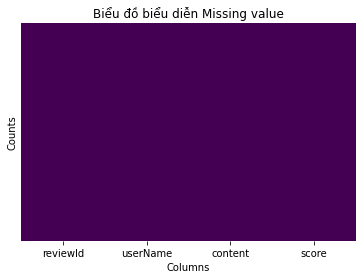

In [9]:
%matplotlib inline
s = sns.heatmap(data=use_df.isnull(), yticklabels=False, cbar =False, cmap = 'viridis')
# s.set(xlabel='X-Axis', ylabel='Y-Axis')
s.set_title('Biểu đồ biểu diễn Missing value')
s.set_xlabel('Columns', fontsize=10)
s.set_ylabel('Counts', fontsize=10)

## 2.5 Exploring the Target Column

*** Distribution of the Target Column ***

**Balanced Dataset:**

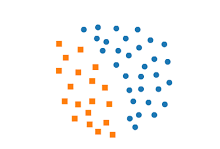


**Imbalanced Dataset:** 

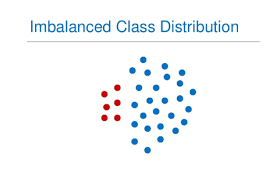

In [10]:
# df['score'].value_counts()
balance_counts = df.groupby('score')['score'].agg('count').values
balance_counts

array([2506, 2344, 1991, 2775, 2879], dtype=int64)

<details><summary><font color=green>Chart</font></summary>
    
%matplotlib inline
from plotly import graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['0'],
    y=[balance_counts[0]],
    name='0',
    text=[balance_counts[0]],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=['1'],
    y=[balance_counts[1]],
    name='1',
    text=[balance_counts[1]],
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=['2'],
    y=[balance_counts[2]],
    name='2',
    text=[balance_counts[2]],
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=['3'],
    y=[balance_counts[3]],
    name='3',
    text=[balance_counts[3]],
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=['4'],
    y=[balance_counts[4]],
    name='4',
    text=[balance_counts[4]],
    textposition='auto',
))

fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()
    
</details>

In [11]:
# helper function to draw percentage above each bar
def draw_percentage(ax,total=float(len(df))):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='bottom')

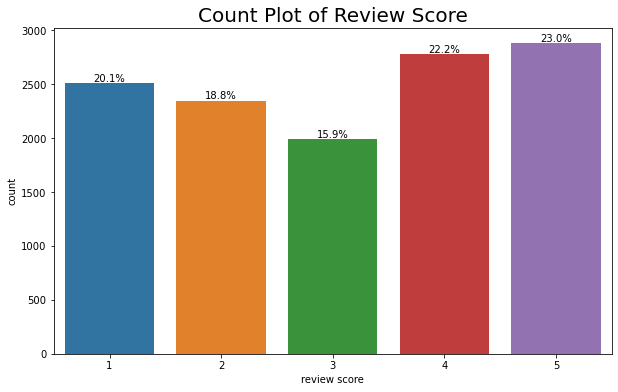

In [12]:
plt.figure(figsize = (10,6))
total = float(len(df))
ax = sns.countplot(x = 'score',data=df)
plt.title('Count Plot of Review Score', fontsize=20)
plt.xlabel('review score')
draw_percentage(ax)
plt.show()

### 2.6 Covert score to sentiment

In [13]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 2
    else:
        return 1

# Apply to the dataset 
use_df['sentiment'] = use_df.score.apply(to_sentiment)

In [14]:
use_df.tail()

,reviewId,userName,content,score,sentiment
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,"I really like the planner, it helps me achieve...",5,1
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,😁****😁,5,1
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,Very useful apps. You must try it,5,1
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,Would pay for this if there were even more add...,5,1
12494,gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...,DAVOR SPASENOSKI,Sooow good,5,1


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

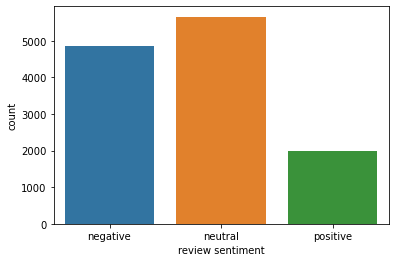

In [15]:
# Plot the distribution
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(use_df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

<a id='3'></a>
# 3. Data Preprocessing

### 1. Làm sạch dữ liệu

Trước khi bắt đầu với bất kỳ dự án NLP nào, chúng ta cần xử lý trước dữ liệu để có được tất cả ở định dạng nhất quán Chúng ta cần làm sạch, mã hóa và chuyển đổi dữ liệu của mình thành ma trận. Một số kỹ thuật xử lý trước văn bản cơ bản bao gồm:

* Tạo văn bản bằng tất cả lower case or uppercase để thuật toán không coi các từ giống nhau trong các trường hợp khác nhau là khác nhau

* Removing Noise, tức là mọi thứ không có trong số hoặc chữ cái chuẩn, tức là Dấu câu, Giá trị số, văn bản không có ý nghĩa thông thường (/ n)

* Tokenization: Tokenization chỉ là thuật ngữ được sử dụng để mô tả quá trình chuyển đổi các chuỗi văn bản bình thường thành một danh sách các mã thông báo tức là các từ mà chúng ta thực sự muốn. Bộ tách câu có thể được sử dụng để tìm danh sách các câu và Bộ tách từ có thể được sử dụng để tìm danh sách các từ trong chuỗi.

* Stopword Removal: Đôi khi, một số từ cực kỳ phổ biến dường như không có giá trị trong việc giúp chọn các tài liệu phù hợp với nhu cầu của người dùng sẽ bị loại trừ hoàn toàn khỏi từ vựng. Những từ này được gọi là các từ dừng

#### Các bước làm sạch dữ liệu khác sau khi mã hóa:

* Stemming: Rút gọn là quá trình giảm các từ được biến đổi (hoặc đôi khi có nguồn gốc) về dạng thân, gốc hoặc gốc của chúng - nói chung là dạng từ viết. Ví dụ, nếu chúng ta cắt các từ sau: “Stems”, “Stemming”, “Stemmed”, “và Stemtization”, kết quả sẽ là một từ duy nhất “stem”.

* Lemmatization: Một biến thể nhỏ của việc tạo gốc là lemmatization. Sự khác biệt chính giữa những từ này là, từ gốc thường có thể tạo ra các từ không tồn tại, trong khi bổ đề là các từ thực tế. Vì vậy, gốc rễ của bạn, nghĩa là từ mà bạn kết thúc, không phải là thứ bạn có thể tra trong từ điển mà có thể tra bổ đề. Ví dụ về Bổ đề là “run” là dạng cơ sở cho các từ như “running” hoặc “ran” hoặc từ “better” và “good” nằm trong cùng một bổ đề nên chúng được coi là giống nhau.

* Parts of speech tagging

* Tạo bi-gram hoặc tri-gram Và hơn thế nữa ...

## 3.1 Remove emojis and remove all special and not necessary characters

In [16]:
# !pip install emot
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [17]:
use_df['new_content'] = use_df['content'].apply(lambda x:remove_emoji(x))

In [18]:
def cleantext(text):
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

In [19]:
use_df['new_content'] = use_df['new_content'].apply(lambda x:cleantext(x))
use_df.isnull().sum()

reviewId       0
userName       0
content        0
score          0
sentiment      0
new_content    0
dtype: int64

In [20]:
use_df['new_content'][330]

'                 TODO                                 '

In [21]:
df_clean = use_df[(use_df['new_content']!=' ')&(use_df['new_content']!='')]
df_clean.shape,use_df.shape

((12446, 6), (12495, 6))

## 3.2 Removal of Stopwords

Chúng có thể bị xóa khỏi văn bản hầu hết các lần, vì chúng không cung cấp thông tin có giá trị cho phân tích hạ nguồn. Trong các trường hợp như gắn thẻ Phần lời nói, chúng tôi không nên xóa chúng vì chúng cung cấp thông tin rất có giá trị về POS.

####  Word Level Analysis

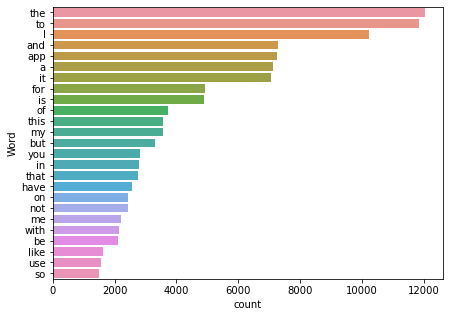

In [22]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sns.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
wordsdf = showmostfrequentwords(df_clean['new_content'],25)

* Bây giờ, hãy loại bỏ các từ dừng, tức là các từ xuất hiện rất thường xuyên nhưng không có giá trị khả dĩ như a, an, the, are, v.v.

In [23]:
def lower_text(text):
    return text.lower()

In [24]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: lower_text(x))
df_clean.head()

,reviewId,userName,content,score,sentiment,new_content
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1,0,i cannot open the app anymore
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1,0,i have been begging for a refund from this app...
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1,0,very costly for the premium version approx ind...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1,0,used to keep me organized but all the 2020 upd...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1,0,dan birthday oct 28


In [25]:
STOPWORDS = nlp.Defaults.stop_words
print(STOPWORDS)

{'except', "'s", 'serious', 'nor', 'ever', 'really', 'noone', 'an', 'neither', '’m', '‘s', 'i', 'over', "n't", 'everywhere', 'whereafter', 'well', 'none', 'some', 'we', 'any', 'without', 'being', 'several', '‘re', 'whole', '’d', 'latterly', 'ourselves', 'however', 'thereupon', 'last', 'once', 'there', 'himself', 'under', 'toward', 'part', 'becoming', 'at', 'below', 'towards', 'whenever', 'of', 'then', 'but', 'the', 'else', 'even', 'least', 'myself', 'five', 'to', 'too', 'down', '‘ve', 'itself', 'such', 'behind', 'just', 'wherein', 'themselves', 'ours', 'where', 'because', 'us', 'same', 'someone', 'fifteen', 'nine', 'twenty', 'sometimes', 'regarding', 'namely', 'also', 'everything', 'indeed', 'moreover', 'move', 'call', 'give', 'another', 'thereby', 'amount', 'anyhow', 'nevertheless', 'from', 'with', 'every', 'their', 'alone', 'go', 'our', 'above', 'have', 'whose', "'re", 'seems', 'thence', 'do', 'hence', 'these', 'about', 'therein', 'anyone', 'it', 'onto', 'whereas', 'became', 'whereup

In [26]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [27]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: remove_stopwords(x))

In [28]:
df_clean['new_content'].iloc[1]

'begging refund app month replying'

## 3.3 Removal freqwords

Nếu chúng ta có một kho ngữ liệu cụ thể về miền, chúng ta cũng có thể có một số từ thường gặp không quá quan trọng đối với chúng ta.

Vì vậy, bước này là loại bỏ các từ thường xuyên trong ngữ liệu đã cho. Nếu chúng tôi sử dụng một cái gì đó như tfidf, điều này sẽ tự động được xử lý.

In [29]:
from collections import Counter
cnt = Counter()
for text in df_clean['new_content'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('app', 7571),
 ('good', 1724),
 ('like', 1722),
 ('use', 1604),
 ('time', 1526),
 ('tasks', 1489),
 ('great', 1485),
 ('calendar', 1188),
 ('task', 1128),
 ('love', 1120)]

In [30]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [31]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: remove_freqwords(x))

In [73]:
df_clean.head()

,reviewId,userName,content,score,sentiment,new_content
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1,0,open anymor
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1,0,beg refund month repli
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1,0,costli premium version approx indian rupe 910 ...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1,0,organ 2020 updat mess thing y cudnt You leav e...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1,0,dan birthday oct 28


## 3.4 Token normalization

Chuẩn hóa mã thông báo có nghĩa là chuyển đổi các mã thông báo khác nhau sang dạng cơ sở của chúng. Điều này có thể được thực hiện bằng cách:

* Lemmatization: loại bỏ và thay thế các hậu tố để chuyển về dạng gốc của từ, được gọi là phần gốc

* Stemming: Trả về dạng cơ sở hoặc từ điển của một từ, được gọi là bổ đề

### 3.4.1 Lemmatizing the Text

In [33]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [34]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: lemmatize_words(x))

### 3.4.2 Stemming the Text

In [35]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [36]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: stem_words(x))

In [37]:
df_clean['new_content'][1258]

'sep 2013 took 1 year decent remind annoy click twice view note product oct 2019 new interfac note disappear interfac copi wunderlist ticktick point pay subscript competit offer function remind note'

In [38]:
df_clean['new_content'][330]

'todo'

## 3.5 Chat Words Conversion

Đây là bước tiền xử lý văn bản quan trọng nếu chúng ta đang xử lý dữ liệu trò chuyện. Mọi người sử dụng rất nhiều từ viết tắt trong trò chuyện và vì vậy có thể hữu ích nếu mở rộng những từ đó cho mục đích phân tích của chúng tôi.

In [39]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [40]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


In [41]:
df_clean['new_content'] = df_clean['new_content'].apply(lambda x: chat_words_conversion(x))

In [42]:
df_clean.head()

,reviewId,userName,content,score,sentiment,new_content
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1,0,open anymor
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1,0,beg refund month repli
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1,0,costli premium version approx indian rupe 910 ...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1,0,organ 2020 updat mess thing y cudnt You leav e...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1,0,dan birthday oct 28


<a id='4'></a>
# 4. Vectorization - Modeling - Accurracy

* Sau giai đoạn tiền xử lý ban đầu, chúng ta cần biến đổi văn bản thành một vectơ (hoặc mảng) số có ý nghĩa.

### Bag of Words

Túi từ là một bản trình bày văn bản mô tả sự xuất hiện của các từ trong tài liệu. Nó liên quan đến hai điều:

* Một vốn từ vựng của các từ đã biết.

* Một thước đo sự hiện diện của các từ đã biết.

Tại sao nó được gọi là “bag” các từ? Đó là bởi vì bất kỳ thông tin nào về thứ tự hoặc cấu trúc của các từ trong tài liệu đều bị loại bỏ và mô hình chỉ quan tâm đến việc liệu các từ đã biết có xuất hiện trong tài liệu hay không, chứ không phải nơi chúng xuất hiện trong tài liệu.

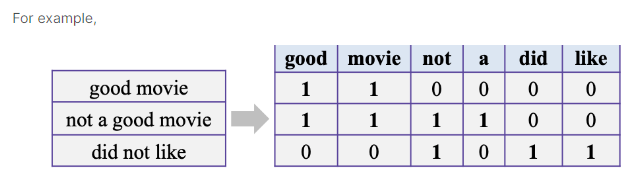

Chúng ta có thể làm điều này bằng cách sử dụng CountVectorizer của scikit-learning, trong đó mỗi hàng sẽ đại diện cho một đánh giá khác nhau và mỗi cột sẽ đại diện cho một từ khác nhau.

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

## 4.1 Using Count-Vectorizer

### Bag of Words - Tính năng Countvectorizer

* Countvectorizer chuyển đổi một bộ sưu tập các tài liệu văn bản thành một ma trận số lượng mã thông báo. Điều quan trọng cần lưu ý ở đây là CountVectorizer đi kèm với rất nhiều tùy chọn để tự động xử lý trước, mã hóa và dừng xóa từ. Tuy nhiên, tôi đã thực hiện tất cả quy trình theo cách thủ công ở trên để hiểu rõ hơn. Hãy sử dụng một triển khai vani của bộ đếm mà không cần chỉ định bất kỳ tham số nào.

In [44]:
## count vectorizer

data = df_clean[['reviewId', 'new_content', 'sentiment']]

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words=STOPWORDS)

bagofword_vec = count_vec.fit_transform(data['new_content'])
bagofword_vec

<12446x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 100361 stored elements in Compressed Sparse Row format>

In [45]:
test = df_clean['sentiment']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((9956, 1000), (2490, 1000))

In [47]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.6734939759036145


In [48]:
cv_rf = RandomForestClassifier()
cv_rf.fit(X_train,y_train)
cv_rf_pred = cv_rf.predict(X_test)
print(metrics.accuracy_score(y_test,cv_rf_pred))

0.6686746987951807


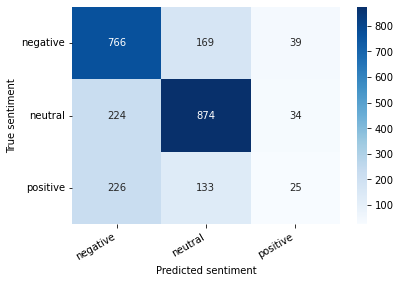

In [49]:
cm_cv_rf = confusion_matrix(y_test, cv_rf_pred)
df_cm_cv_rf = pd.DataFrame(cm_cv_rf, index=class_names, columns=class_names)
show_confusion_matrix(df_cm_cv_rf)

## 4.2 Using TF-IDF

### Tính năng TFIDF

* Một vấn đề với phương pháp Bag of Words là các từ có tần suất cao bắt đầu chiếm ưu thế trong tài liệu (ví dụ: điểm lớn hơn), nhưng có thể không chứa nhiều “nội dung thông tin”. Ngoài ra, nó sẽ tăng trọng lượng cho các tài liệu dài hơn so với các tài liệu ngắn hơn.

* Một cách tiếp cận là bán lại tần suất của các từ theo tần suất chúng xuất hiện trong tất cả các tài liệu để điểm số cho các từ thường xuyên như “the” cũng thường xuyên xuất hiện trên tất cả các tài liệu sẽ bị phạt. Cách tiếp cận để tính điểm này được gọi là Tần suất tài liệu nghịch đảo thuật ngữ, viết tắt là TF-IDF, trong đó:

Term Frequency: là điểm số của tần suất xuất hiện của từ trong tài liệu hiện tại.

* TF = (Số lần thuật ngữ t xuất hiện trong tài liệu) / (Số thuật ngữ trong tài liệu)

Inverse Document Frequency:là điểm cho biết mức độ hiếm của từ này trong các tài liệu.

* IDF = 1 + log (N / n), trong đó, N là số lượng tài liệu và n là số lượng tài liệu mà một thuật ngữ t đã xuất hiện.

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = df_clean[['reviewId', 'new_content', 'sentiment']]

y=data['sentiment']

X_train,X_test,y_train,y_test = train_test_split(df_clean['new_content']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((9956,), (2490,))

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [52]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain_tfidf,y_train)
dtree_pred = dtree.predict(xtest_tfidf)
metrics.accuracy_score(y_test,dtree_pred)

0.5967871485943775

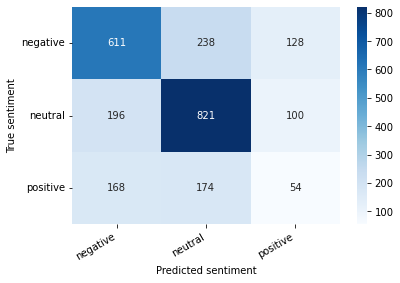

In [53]:
cm_dt = confusion_matrix(y_test, dtree_pred)
df_cm_dt = pd.DataFrame(cm_dt, index=class_names, columns=class_names)
show_confusion_matrix(df_cm_dt)

In [54]:
rf = RandomForestClassifier()
rf.fit(xtrain_tfidf,y_train)
rf_pred = rf.predict(xtest_tfidf)
metrics.accuracy_score(y_test,rf_pred)

0.6807228915662651

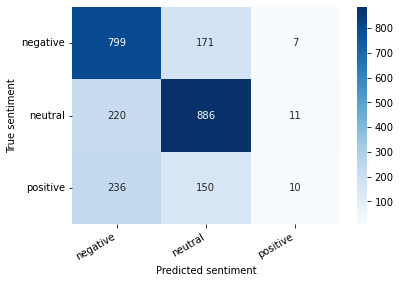

In [55]:
cm_rf = confusion_matrix(y_test, rf_pred)
df_cm_rf = pd.DataFrame(cm_rf, index=class_names, columns=class_names)
show_confusion_matrix(df_cm_rf)

In [56]:
lr = LogisticRegression()
lr.fit(xtrain_tfidf,y_train)
lr_pred = lr.predict(xtest_tfidf)
metrics.accuracy_score(y_test,lr_pred)

0.6943775100401607

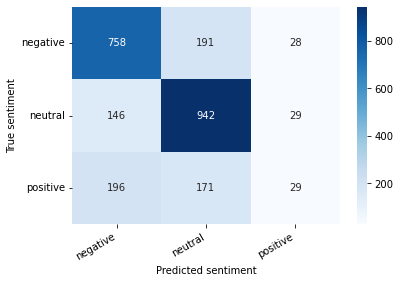

In [57]:
cm = confusion_matrix(y_test, lr_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

## 4.3 Using TF-DIF X NFM

+ NMF (Phân tích nhân tử ma trận không âm) là một kỹ thuật rất hiệu quả để chọn thông tin quan trọng nhất có trong kho tài liệu đào tạo, nó là một dạng mô hình hóa Chủ đề và có thể được sử dụng trong nhiều lĩnh vực như Hệ thống khuyến nghị, Mô hình học xếp hạng và Chủ đề Lập mô hình, tôi đã chia sẻ một tài nguyên nơi người ta có thể xem chi tiết các tiện ích của NMF!

+ https://towardsdatascience.com/nmf-a-visual-explainer-and-python-implementation-7ecdd73491f8
+ https://www.analyticsvidhya.com/blog/2021/06/part-15-step-by-step-guide-to-master-nlp-topic-modelling-using-nmf/

+ Vì vậy, cách sử dụng NMF như sau
    
    + Chuyển đổi văn bản thô thành Vectơ bằng cách sử dụng vectơ TF-IDF
    + Chuyển các vector thành dạng NFM, tách ma trận NXM thành NXP và PXM tương ứng,
    + Trong đó N là tổng số câu, P là số chủ đề, M là số hạng trong câu.
    + Sau đó, dựa trên kết quả ma trận NMF, tôi đã tạo một khung dữ liệu với văn bản và nhãn là các thuộc tính.
    + Số lượng chủ đề và n_iter là siêu tham số, có thể điều chỉnh chúng cho phù hợp bằng cách sử dụng GridSearch hoặc RandomizedSearch
    + Ở đây trong ví dụ này, tôi đã chọn n_topics là 5 và n_iters là 500, có thể thay đổi tùy người dùng

In [58]:
text = list(df_clean['new_content'])
print(len(text))

12446


In [59]:
vec = TfidfVectorizer()
tfd = vec.fit_transform(text)

In [60]:
from sklearn.decomposition import NMF

In [61]:
num_topics = 3
nmf = NMF(n_components=num_topics, random_state=50, max_iter=500)

In [62]:
W1 = nmf.fit_transform(tfd)
H1 = nmf.components_

In [63]:
df_new = pd.DataFrame({'text':text, 'label':[np.argmax(i) for i in W1]})
df_new

,text,label
0,open anymor,0
1,beg refund month repli,0
2,costli premium version approx indian rupe 910 ...,0
3,organ 2020 updat mess thing y cudnt You leav e...,0
4,dan birthday oct 28,0
...,...,...
12441,ok undestad repeat shedul,0
12442,planner help achiev goal avenu scribe idea dou...,2
12443,use app tri,0
12444,pay addit updat absolut wish develop,0


In [64]:
df_new['label'].value_counts()

0    10163
2     1751
1      532
Name: label, dtype: int64

In [65]:
train,test = train_test_split(df_new, train_size=0.7, random_state=25, stratify=df_new.label)

X_train = train.text
y_train = train.label

X_test = test.text
y_test = test.label

In [66]:
vec = TfidfVectorizer()
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf,y_train)
dt_pred = dt.predict(X_test_tfidf)
print(metrics.classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3049
           1       0.91      0.99      0.95       160
           2       0.84      0.85      0.84       525

    accuracy                           0.95      3734
   macro avg       0.91      0.94      0.92      3734
weighted avg       0.95      0.95      0.95      3734



In [68]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
rf_pred = rf.predict(X_test_tfidf)
print(metrics.classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3049
           1       0.96      0.94      0.95       160
           2       0.92      0.84      0.88       525

    accuracy                           0.96      3734
   macro avg       0.95      0.92      0.94      3734
weighted avg       0.96      0.96      0.96      3734



In [69]:
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
lr_pred = lr.predict(X_test_tfidf)
print(metrics.classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3049
           1       1.00      0.82      0.90       160
           2       0.96      0.74      0.84       525

    accuracy                           0.95      3734
   macro avg       0.97      0.85      0.90      3734
weighted avg       0.95      0.95      0.95      3734



In [70]:
# class_nmf = ['Very negative', 'Negative', 'Neutral', 'Positive', 'Very positive'] 

In [71]:
class_nmf = ['Negative', 'Neutral', 'Positive']

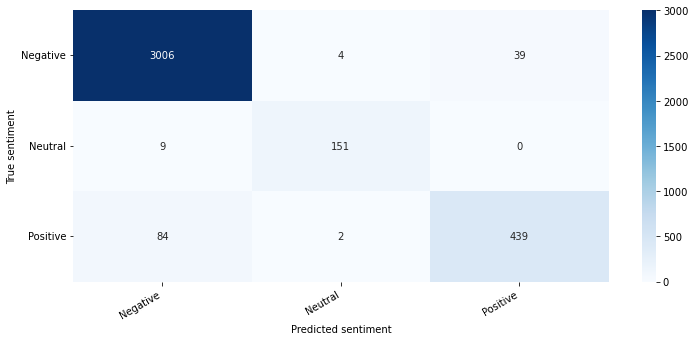

In [74]:
plt.figure(figsize=(12,5))
cm_nmf_rf = confusion_matrix(y_test, rf_pred)
df_cm_nmf_rf = pd.DataFrame(cm_nmf_rf, index=class_nmf, columns=class_nmf)
show_confusion_matrix(df_cm_nmf_rf)

# Conclusions

+ Như chúng ta có thể quan sát rằng trước khi sử dụng NMF, trọng số f1 sử dụng TF-IDF là khoảng 40-50%.

+ Sau khi sử dụng NMF và TF-IDF, khẩu độ f1 đã tăng lên gần 95%.

+ Như vậy, ở kịch bản này đã giúp NMF có được điểm số tốt hơn.

+ NMF cũng có thể được sử dụng trong một số nhiệm vụ NLP khác, như Lập mô hình chủ đề, Hệ thống khuyến nghị, Học cách xếp hạng và nhiều hơn nữa.

# Deep Learning